In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse

### Problem 2

In [44]:
mse_ols = {}
mse_las = {}

for p in range(2, 81):
    X = np.random.randn(100, p)
    Y = 4 * X.T[0] + np.random.randn(100)

    X_ = np.random.randn(100, p)
    Y_ = 4 * X.T[0] + np.random.randn(100)

    train = np.concatenate((X, Y.reshape(100,1)), axis=1)
    test = np.concatenate((X_, Y_.reshape(100,1)), axis=1)
    ols = LinearRegression().fit(train[:, :-1], train[:,-1])
    las = Lasso(alpha=0.5).fit(train[:, :-1], train[:,-1])
    pred_ols = ols.predict(X_)
    pred_las = las.predict(X_)
    mse_ols[p] = mse(Y_, pred_ols)
    mse_las[p] = mse(Y_, pred_las)

Text(0.5, 1.0, 'Mean Squared Error vs p')

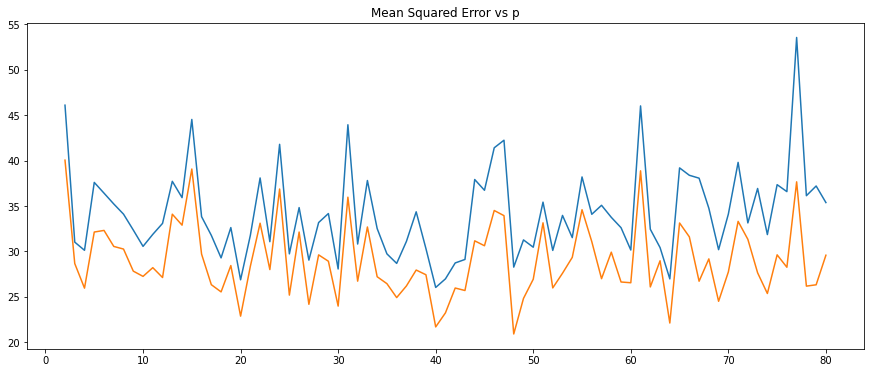

In [45]:
fig,ax = plt.subplots(figsize=(15,6))
ax.plot(mse_ols.keys(), mse_ols.values())
ax.plot(mse_las.keys(), mse_las.values())

ax.set_title("Mean Squared Error vs p")

feature의 갯수가 증가하더라도 모형의 성능향상에 도움이 되지 않는다. 이는 실제모형과는 무관한 독립변수가 독립변수로 활용되었기 때문이다. 

### Problem 3

(1)

$$
\text { Let } \sum_{i=1}^{n}\left(y_{i}-\left(b_{1}+b_{2} x_{2 i}+b_{3} x_{3 i}\right)\right)^{2}:=u
$$

$$
\begin{aligned}
&\frac{d u}{d b_{2}}=\sum_{i=1}^{n}-2 x_{2 i}\left(y_{i}-\left(b_{1}+b_{2} x_{2 i}+b_{3} x_{3 i}\right)\right)=0 \\
&\frac{d u}{d b_{3}}=\sum_{i=1}^{n}-2 x_{3 i}\left(y_{i}-\left(b_{1}+b_{2} x_{2 i}+b_{3} x_{2 i}\right)\right)=0
\end{aligned}
$$

$$
\begin{aligned}
&-2 \sum x_{2 i} y_{i}+2 n \cdot b_{1} \bar{X}_{2}+2 b_{2} \sum x_{2 i}^{2}+2 b_{3} \sum x_{2 i} x_{3 i}=0 \\
&-2 \sum x_{3 i} y_{i}+2 n \cdot b_{1} \bar{x}_{3}+2 b_{2} \sum x_{2 i} x_{3 i}+2 b_{3} \sum x_{3 i}^{2}=0
\end{aligned}
$$

$$
b_{1}=\bar{Y}-b_{2} \bar{X}_{2}-b_{3} \overline{X_{3}}
$$ 


$$
b_{2}=\frac{-b_{3}\left(\sum X_{2 i} X_{3 i}-n \bar{X}_{2} \bar{X}_{3}\right)+\left(\sum X_{2 i} Y_{i}+n \overline{X_{2}} \bar{Y}\right)}{\left(\sum x_{2 i}^{2}-n \bar{X}_{2}^{2}\right)}
$$

$$
b_{3}=\frac{-b_{2}\left(\sum X_{2 i} X_{3 i}-n \overline{X_{2}} \bar{X}_{3}\right)+\left(\sum X_{3 i} i t_{i}+n \overline{X_{3}} \bar{y}\right)}{\left(\sum X_{3 i}{ }^{2}-n \bar{X}_{3}^{2}\right)}
$$

$$
b_{2}=\frac{S_{24}-b_{3} \cdot S_{23}}{S_{22}}, b_{3}=\frac{S_{2 y}-b_{2} S_{23}}{S_{23}}
$$

$$
\begin{aligned}
b_{3} &=\frac{S_{3y}-\left(\frac{S_{23} S_{2y}-b_{3} S_{23}^{2}}{S_{22}}\right)}{S_{33}} \\
&=\frac{S_{22} \cdot S_{3y}-S_{23} S_{2y}}{S_{22} \cdot S_{33}}+b_{3} \frac{S_{23}^{2}}{S_{22} \cdot S_{33}}
\end{aligned}
$$

$$
\begin{aligned}
&\cdot b_{3}=\frac{S_{22} \cdot S_{3y}-S_{23} S_{2y}}{S_{22} \cdot S_{33}-S_{23}^{2}} \\
&\cdot b_{2}=\frac{S_{2y} \cdot S_{33}-S_{3y} S_{23}}{S_{22} \cdot S_{33}-S_{23}^{2}}
\end{aligned}
$$

## Loss Function

### KL Divergence 

$$
B C E=-y \log (\hat{y})-(1-y) \log (1-\hat{y})
$$

이진분류 문제의 경우, 우리는 주어진 feature를 기반으로 해당 instance의 class를 예상해야한다.

Binary Cross Entropy는 위와 같이 정의된다. y는 실제값이고, y_hat은 모형의 예측값이다. 

만일 예측값과 실제값이 일치하면 BCE는 0이 되고, 일치하지 않는다면 무한을 가리킨다.

$$
C E=\sum_{x \in \chi}(-P(x) \log (Q(x)))
$$

이를 이진분류가 아닌 다중클래스 분류문제로 확장하면 Cross Entropy는 위와 같이 정의된다.

결국 CE는 실제 Target값과 모형의 예측값이 얼마나 다른지를 나타내는 모형으로, 실제값 대비 모형이 이상치를 산출했을 때 획득하는 정보의 양을 의미하게된다.

아래는 CE를 설명할 때 자주 쓰이는 주사위 예시다. 일반적인 주사위에서의 Entropy값보다 특정 눈금이 나올 확률이 1/2인 주사위의 CE가 높음을 확인할 수 있다.

$$
-\sum_{i} P\left(x_{i}\right) \log \left(Q\left(x_{i}\right)\right)=-\left(\frac{1}{6} \log _{2}(1 / 2)+\frac{5}{6} \log _{2}(1 / 10)\right)=2.9349 \text { bit }
$$

$$
-\sum_{i} P\left(x_{i}\right) \log \left(P\left(x_{i}\right)\right)=-\left(\frac{6}{6} \log _{2}(1 / 6)\right)=2.5850 \mathrm{bit}
$$

$$
D_{K L}(P \| Q)=\sum_{x \in \chi} P(x) \log _{b}\left(\frac{P(x)}{Q(x)}\right)
$$

$$
-E_{P}\left[\log _{b} Q(x)\right]+E_{P}\left[\log _{b} P(x)\right]
$$

$$
D_{K L}(P \| Q)=H_{P}(Q)-H(P)
$$

이제 CE에 대한 개념을 인지한체로, KL Divergence를 확인해보자. 

위 식을 전개하면 아래의 두 기대값에 대한 합으로 표현된다.

이는 곧 P가 실제분포라 산정했을 떄의 예측분포 Q의 CE에서 P에 대한 정보엔트로피값을 빼준 것이다. 

만약 실제분포 대비 예측분포의 엔트로피값이 높다면, 즉 분포의 유사도가 떨어진다면 KL Divergence는 높게 나온다.

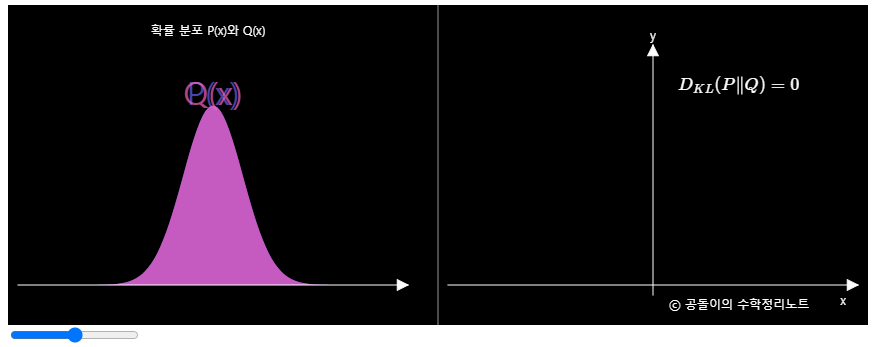

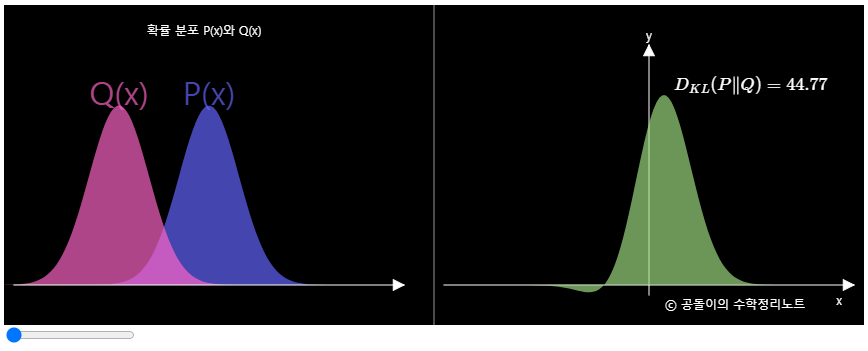

보편적으로 KL Divergence는 확률분포간의 distance를 나타내기 위해 사용되지만,
label값인 확률분포 P(X)에 대해 모형의 예측분포인 Q(X)가 근사하도록 KL Divergence를 Loss function으로 사용할 수도 있다.

$$
p(z \mid x) \rightarrow q(z)
$$

$$
q^{*}(x)=\operatorname{argmin}_{q \in Q} D_{K L}(q(z) \| p(z \mid x))
$$